In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
# TO DO: load iris dataset with load_iris - 1 line
iris_data = load_iris()

In [3]:
# the type of iris dataset
type(iris_data)

sklearn.utils.Bunch

In [4]:
# documentation
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# feature names
print(iris_data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# target names
print(iris_data.target_names)

['setosa' 'versicolor' 'virginica']


In [7]:
# TO DO: assign the features to X and the targets to y - 2 lines
X = iris_data.data
y = iris_data.target

In [8]:
# TO DO: split train and test data with train_test_split - 1 line
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=24)

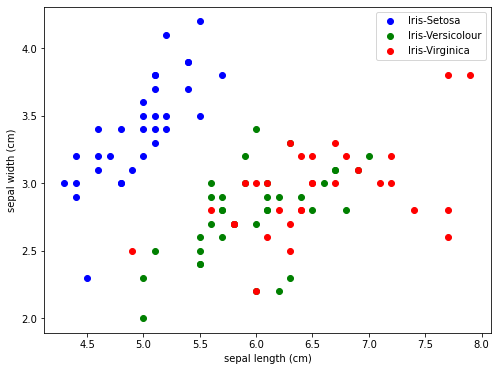

In [9]:
# plot train data
y0 = (y_train == 0)
y1 = (y_train == 1)
y2 = (y_train == 2)

# visualize the first 2 features
plt.figure(figsize=[8, 6])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(X_train[y0, 0], X_train[y0, 1], c='b', label='Iris-Setosa')
plt.scatter(X_train[y1, 0], X_train[y1, 1], c='g', label='Iris-Versicolour')
plt.scatter(X_train[y2, 0], X_train[y2, 1], c='r', label='Iris-Virginica')
plt.legend()

In [10]:
# TO DO: create a KNN model - 1 line
knn = KNeighborsClassifier()  # default value of k is 5

In [11]:
# TO DO: fit the KNN model to the train data - 1 line
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
# TO DO: make predictions on the test data - 1 line
y_pred = knn.predict(X_test)

In [13]:
# accuracy of the KNN model
accuracy = (y_test == y_pred).sum()/y_test.shape[0]
print('Accuracy:', accuracy)

Accuracy: 0.98


In [14]:
# TO DO: can you find the best k(s) for this dataset?
# Feel free to solve this problem with brute force
accuracies = []

for k in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  accuracies.append(knn.score(X_test, y_test))  # another way to compute the accuracy

print('Best k:', np.array(accuracies).argmax())

Best k: 7


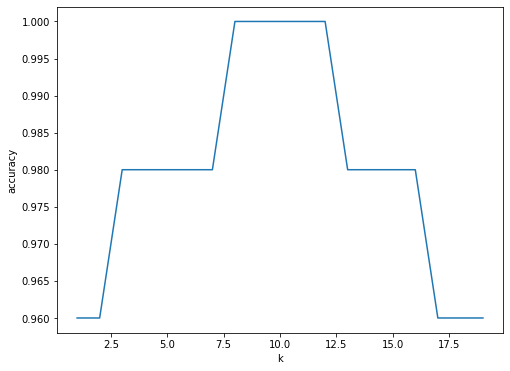

In [15]:
# plot k vs accuracy
plt.figure(figsize=[8, 6])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(np.arange(1, 20), accuracies)

### Turns out the best k is around the range of 10, which is the square root of the size of the train data. You can verify that by checking the value of X_train.shape[0].

In [16]:
X_train.shape[0]

100